<h3>Aufgabe: Trainieren Sie einen Klassifikator, der optimal eine Brustgewebezelle als gutartig bzw. bösartig erkennen soll.</h3>

<p>Eingangsdaten: training_data.csv

Abzugeben sind zwei Skripte/Funktionen:
trainClassifier (Trainiert mithilfe von training_data.csv einen Klassifikator)
predictDiagnosis (Klassifiziert Eingangsdaten, die das gleiche Format wie training_data.csv besitzen)

Erforderliche Doku: Begründung der Auswahl des Klassifikators und geeignete Evaluation.

---------------------------------------------
</p>
<h3>Data Set Information:</h3>

<p>Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.


<h4>Attribute Information:</h4>

    1) ID number 
    2) Diagnosis (M = malignant, B = benign) 
    3-32) 

Ten real-valued features are computed for each cell nucleus: 

    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values) 
    c) perimeter 
    d) area 
    e) smoothness (local variation in radius lengths) 
    f) compactness (perimeter^2 / area - 1.0) 
    g) concavity (severity of concave portions of the contour) 
    h) concave points (number of concave portions of the contour) 
    i) symmetry 
    j) fractal dimension ("coastline approximation" - 1)


<h3>Relevant Papers:</h3>

First Usage: 

    -W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993. 
    -O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and prognosis via linear programming. Operations Research, 43(4), pages 570-577, July-August 1995. 

Medical literature: 

    -W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 163-171. 
    -W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Image analysis and machine learning applied to breast cancer diagnosis and prognosis. Analytical and Quantitative Cytology and Histology, Vol. 17 No. 2, pages 77-87, April 1995. 
    -W.H. Wolberg, W.N. Street, D.M. Heisey, and O.L. Mangasarian. Computerized breast cancer diagnosis and prognosis from fine needle aspirates. Archives of Surgery 1995;130:511-516. 
    -W.H. Wolberg, W.N. Street, D.M. Heisey, and O.L. Mangasarian. Computer-derived nuclear features distinguish malignant from benign breast cytology. Human Pathology, 26:792--796, 1995. </p>
        

In [188]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('training_data.csv',sep=',',index_col='id')
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concavepoints_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


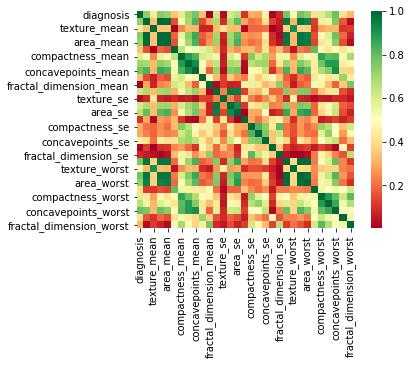

In [189]:
# Daten explorieren
#print(df.describe())
#print(df.columns)
#print(df.dtypes)
#print(df['diagnosis'].unique())
#print(df.dtypes)
#0 ok , 1 bösartig  
tumor_class = {'B':0 , 'M':1}
df['diagnosis'] = df['diagnosis'].map(tumor_class)
sns.heatmap(df.corr().abs(), square=True, cmap='RdYlGn');

diagnosis              1.000000
radius_mean            0.732088
texture_mean           0.434871
perimeter_mean         0.744596
area_mean              0.716835
compactness_mean       0.590129
concavity_mean         0.710124
concavepoints_mean     0.775007
radius_se              0.629747
perimeter_se           0.616376
area_se                0.662673
concavepoints_se       0.451063
radius_worst           0.772208
texture_worst          0.474300
perimeter_worst        0.778292
area_worst             0.732549
smoothness_worst       0.409960
compactness_worst      0.593855
concavity_worst        0.661436
concavepoints_worst    0.789898
symmetry_worst         0.411490
Name: diagnosis, dtype: float64
------
Index(['smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'symmetry_se', 'fractal_dimension_se', 'fractal_dimension_worst'],
      dtype='object')
------
Index(['diagnosis', 'radius_mean', 'texture_m

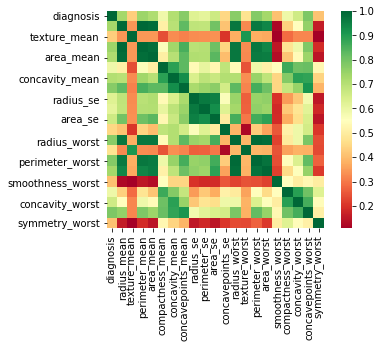

In [190]:
######Clean Data
data = df.loc[:,((df.corr().loc['diagnosis'].abs() >= 0.4)).values]
col_to_drop = df.loc[:,((df.corr().loc['diagnosis'].abs() < 0.4)).values]

sns.heatmap(data.corr(), square=True, cmap='RdYlGn');
print(data.corr().loc['diagnosis'])
print('------')
print(col_to_drop.columns)
print('------')
print(data.columns)

In [191]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['diagnosis'])
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=12345)

In [192]:
from sklearn.preprocessing import StandardScaler

# Instanziieren Sie ein Objekt StandardScaler()
stdScaler = StandardScaler()

# Berechnen Sie die Standardisierungsparameter auf dem Trainingsset (!) X_train mit Hilfe der Funktion "fit()"
stdScaler.fit(X_train)
# Wenden Sie die **selbe** Standardisierung mit Hilfe der Methode transform() auf die Trainings- und Testdaten an
X_train = stdScaler.transform(X_train)
X_test = stdScaler.transform(X_test)
X_full = np.concatenate((X_train,X_test))

In [193]:
# Import des Objekts SVC aus dem Modul svm im Paket sklearn
from sklearn.svm import SVC

# Instanziieren eines Objekts
svm_model = SVC()
# Trainieren Sie das Modell
svm_model.fit(X_train,y_train)
# Berechnen Sie den Trainings- und Testscore in Prozent
train_score_svm = svm_model.score(X_train,y_train)
test_score_svm = svm_model.score(X_test,y_test)

# Ausgabe der Performance
print("Support Vector Machine - Training: {:.2f} % Test: {:.2f} %".format(train_score_svm, test_score_svm))
# Parametergitter aufstellen
param_grid_svm = [
    {'C': np.logspace(-5, 2, 8), # Die Numpy-Funktion "logspace" liefert eine logarithmische Zahlenreihe (z. B. [0.01, 0.1, 1, 10])
     'kernel': ['linear', 'rbf']}
]

# Gittersuche aufsetzen
svm_model = GridSearchCV(svm_model,param_grid_svm, 
                         cv=15,verbose=10,n_jobs=-1)
# Gittersuche durchführen
svm_model.fit(X_train,y_train)

Support Vector Machine - Training: 0.97 % Test: 0.98 %
Fitting 15 folds for each of 16 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1846s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0400s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0678s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 182 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed: 

GridSearchCV(cv=15, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'kernel': ['linear', 'rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

In [194]:
# Ausgabe der besten gefundenen Hyperparameter
print('get_params param')
print(svm_model.get_params)

print('best_params_ param')
print(svm_model.best_params_)
# Berechnen Sie den Trainings- und Testscore in Prozent
train_score_svm = svm_model.score(X_train,y_train)
test_score_svm = svm_model.score(X_test,y_test)

# Ausgabe der Performance
print("Tuned Support Vector Regression: Training R^2 = {:.2f} Test R^2 = {:.2f}".format(train_score_svm, test_score_svm))


get_params param
<bound method BaseEstimator.get_params of GridSearchCV(cv=15, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'kernel': ['linear', 'rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)>
best_params_ param
{'C': 0.1, 'kernel': 'linear'}
Tuned Support Vector Regression: Training R^2 = 0.98 Test R^2 = 0.98


In [198]:
#df['diagnosis'] = df['diagnosis'].apply(lambda val: 'M' if val==1 else 'B')
df.head()
# print(df.columns)
# print(df.shape)
# print('____________')
# print(data.columns)
# print(data.shape)
# print('____________')
# print(col_to_drop.columns)
# print(col_to_drop.shape)
# print('xx____________')
# print(X.columns)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concavepoints_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [196]:
# Importieren Sie das Modul pickle
import pickle

with open('tumor_predictor.pickle', 'wb') as model_file:
    # Schreiben Sie die beiden Objekte in die Datei
    pickle.dump([svm_model, stdScaler, X.columns], model_file)